In [207]:
reload_toocan = False # part of code that takes long time

<span style="color:pink">## choose subregion</span>

In [208]:
lon_min_subregion = 130
lon_max_subregion = 165
lat_min_subregion = 0
lat_max_subregion = 20

# Imports

In [209]:
%reload_ext autoreload
%matplotlib inline

In [210]:
%autoreload 2

import sys,os,glob
import psutil

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
from pprint import pprint
import datetime as dt


from matplotlib.colors import LogNorm
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs

import datetime as dt
import re
import gc
import matplotlib.animation as animation
import warnings
import pickle
from scipy.interpolate import interp1d
from pprint import pprint 


#-- Own settings

sys.path.append('/home/gmaxemin/code/stage-2023-rain-extremes-timing-intensity/scripts/start')


from my_functions import *
from load_TOOCAN_DYAMOND_modif_BF import load_TOOCAN_DYAMOND

# Paths

In [211]:
# path = '/home/gmaxemin/windows/internship_g_maxemin/DYAMOND_REGIONS'
toocan_path = "/data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOBAL/2016/FileTracking"
# filename = 'TOOCAN-GLOBAL-20160801-20160831.dat.gz'
toocan_filename = 'TOOCAN-GLOBAL-20160801-20160831.dat.gz'

In [212]:
#-- Paths

# DIR_DYAMOND (where DYAMOND data are)

path_DYAMOND_REGIONS = '/data/bfildier/DYAMOND_REGIONS/'
path_reg1_SAM = os.path.join(path_DYAMOND_REGIONS, "130E_165E_0N_20N/SAM")
path_2D = os.path.join(path_reg1_SAM,'2D')

DIR_DYAMOND = path_2D
print(DIR_DYAMOND)

# DIR_DATA (where segmentation relation table is)

DIR_DATA = "/home/gmaxemin/code/stage-2023-rain-extremes-timing-intensity/input/"

/data/bfildier/DYAMOND_REGIONS/130E_165E_0N_20N/SAM/2D


In [213]:
# Load relation table DYAMOND-TOOCAN
filename_table = 'relation_2_table_UTC_dyamond_segmentation.csv'
# load
df = pd.read_csv(os.path.join('/home/gmaxemin/code/stage-2023-rain-extremes-timing-intensity/scripts',filename_table))
# sort
df.sort_values(by='UTC',ignore_index=True,inplace=True)
# show
df

,Unnamed: 0,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,img_seg_path,str_code,Unnamed: 0.1,Unnamed: 0.1.1,year,month,day,hour,minute,path_dyamond,UTC
0,476,476.0,476.0,476.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-1-30,2.0,2.0,2016.0,8.0,1.0,1.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000000720,17014.03
1,443,443.0,443.0,443.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-2-0,3.0,3.0,2016.0,8.0,1.0,2.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000000960,17014.04
2,468,468.0,468.0,468.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-2-30,4.0,4.0,2016.0,8.0,1.0,2.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000001200,17014.05
3,432,432.0,432.0,432.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-3-0,5.0,5.0,2016.0,8.0,1.0,3.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000001440,17014.06
4,437,437.0,437.0,437.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-3-30,6.0,6.0,2016.0,8.0,1.0,3.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000001680,17014.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1914,1295,1295.0,1295.0,1295.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-9-22-30,1916.0,1916.0,2016.0,9.0,9.0,22.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460080,17053.45
1915,1315,1315.0,1315.0,1315.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-9-23-0,1917.0,1917.0,2016.0,9.0,9.0,23.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460320,17053.46
1916,1313,1313.0,1313.0,1313.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-9-23-30,1918.0,1918.0,2016.0,9.0,9.0,23.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460560,17053.47
1917,1304,1304.0,1304.0,1304.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-10-0-0,1919.0,1919.0,2016.0,9.0,10.0,0.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460800,17053.48


# Load Toocan Data

In [214]:
if reload_toocan == True:
    toocan = load_TOOCAN_DYAMOND(os.path.join(toocan_path,toocan_filename))

In [215]:
#- redefining toocan for subregion

filtered_toocan = []

for obj in toocan:
    # Check if the object is within the desired region
    if (
        obj.lonmin <= lon_max_subregion
        and obj.lonmax >= lon_min_subregion
        and obj.latmin <= lat_max_subregion
        and obj.latmax >= lat_min_subregion
    ):
        # Check and modify lonmin
        if obj.lonmin < lon_min_subregion:
            obj.lonmin = lon_min_subregion
        if obj.lonmin > lon_max_subregion:
            obj.lonmin = lon_max_subregion

        # Check and modify lonmax
        if obj.lonmax < lon_min_subregion:
            obj.lonmax = lon_min_subregion
        if obj.lonmax > lon_max_subregion:
            obj.lonmax = lon_max_subregion

        # Check and modify latmin
        if obj.latmin < lat_min_subregion:
            obj.latmin = lat_min_subregion
        if obj.latmin > lat_max_subregion:
            obj.latmin = lat_max_subregion

        # Check and modify latmax
        if obj.latmax < lat_min_subregion:
            obj.latmax = lat_min_subregion
        if obj.latmax > lat_max_subregion:
            obj.latmax = lat_max_subregion
            
        filtered_toocan.append(obj)

toocan = filtered_toocan

# Functions

In [216]:
data_reference = dt.datetime(1970, 1, 1)

In [278]:
def convertSingleDate(unconverted_date):
    unconverted_date = str(unconverted_date)
    date_split = unconverted_date.split('.')
    
    if len(date_split[1]) == 1: # adding a zero in case of "1704.1", "1704.2", etc so that "1","2" are interpreted as "10","20"
        date_split[1] = date_split[1] + '0'
    
    date_converted = data_reference + dt.timedelta(days=int(date_split[0])) + dt.timedelta(hours=( int(date_split[1]) / 2) )
    return date_converted

def convertDate(attribute, data):
    dates_list = []
    for obj in data:
        date = str( getattr(obj, attribute) ) 
        date_split = date.split('.')
        
        if len(date_split[1]) == 1: # adding a zero in case of "1704.1", "1704.2", etc so that "1","2" are interpreted as "10","20"
            date_split[1] = date_split[1] + '0'
        
        date_converted = data_reference + dt.timedelta(days=int(date_split[0])) + dt.timedelta(hours=( int(date_split[1]) / 2) )
        dates_list.append(date_converted)    
    return dates_list

def convertDateCluster(attribute, data): # Does not work with Localtime
    date_list_final = []
    for obj in data:
        date_list_0 = getattr(obj.clusters, attribute)
        date_list_1 = []
        for time in date_list_0:
            date = str(time)
            date_split = date.split('.')
            
            if len(date_split[1]) == 1: # adding a zero in case of "1704.1", "1704.2", etc so that "1","2" are interpreted as "10","20"
                date_split[1] = date_split[1] + '0'
            
            date_converted = data_reference + dt.timedelta(days=int(date_split[0])) + dt.timedelta(hours=( int(date_split[1]) / 2) )
            date_list_1.append(date_converted)
        date_list_final.append(date_list_1)
    return date_list_final

def attr_list(data, attr_name):
    # Extract the attribute values from the data
    attribute_values = [getattr(obj, attr_name) for obj in data]
    return attribute_values

def binTimeData_by_mins(data, bins, n_min):
    count_per_bin = [0] * len(bins)
    # iterate over each value in data
    for d in data:
        # find the index of the first bin that the value falls into
        bin_index = np.where((d >= bins) & (d < bins + pd.Timedelta(minutes=n_min)))[0]
        if bin_index:
            count_per_bin[bin_index[0]] += 1  # increment count
    
    return count_per_bin

def binTimeData_by_step(data, bins, step):
    count_per_bin = [0] * len(bins)
    
    # iterate over each value in data
    for d in data:
        # find the index of the first bin that the value falls into
        bin_index = np.where((d >= bins) & (d < bins + step))[0]
        if bin_index:
            count_per_bin[bin_index[0]] += 1  # increment count
    
    return count_per_bin

In [283]:
localtime_Init_dates = convertDate("localtime_Init", toocan)
localtime_End_dates = convertDate("localtime_End", toocan)
Utime_Init_list = convertDate("Utime_Init", toocan)
Utime_End_list = convertDate("Utime_End", toocan)

Utime_list = convertDateCluster("Utime", toocan)

# Binning Births and Deaths (METHOD 1)
* Method 1 = binning via a for loop and np.where

determining time bins

In [284]:
start_time = min(Utime_Init_list)
end_time = max(Utime_End_list)
binsize = '30T'

time_bins = pd.date_range(start=start_time, end=end_time, freq=binsize)

binning the Init and End times into time_bins

In [285]:
count_per_bin_Init = binTimeData_by_mins(Utime_Init_list, time_bins, n_min=30)
count_per_bin_End = binTimeData_by_mins(Utime_End_list, time_bins, n_min=30)

complete plot

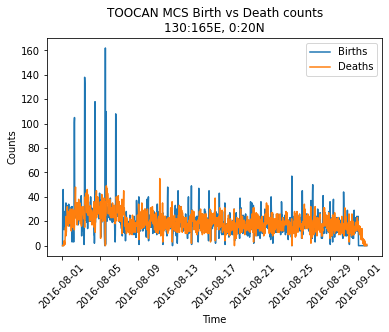

In [286]:
plt.plot(time_bins, count_per_bin_Init, label="Births")
plt.plot(time_bins, count_per_bin_End, label="Deaths")

plt.xlabel("Time")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.legend()
plt.title(f"TOOCAN MCS Birth vs Death counts\n{lon_min_subregion}:{lon_max_subregion}E, {lat_min_subregion}:{lat_max_subregion}N")

# Display the plot
plt.show()

plotting only a small range of timesteps

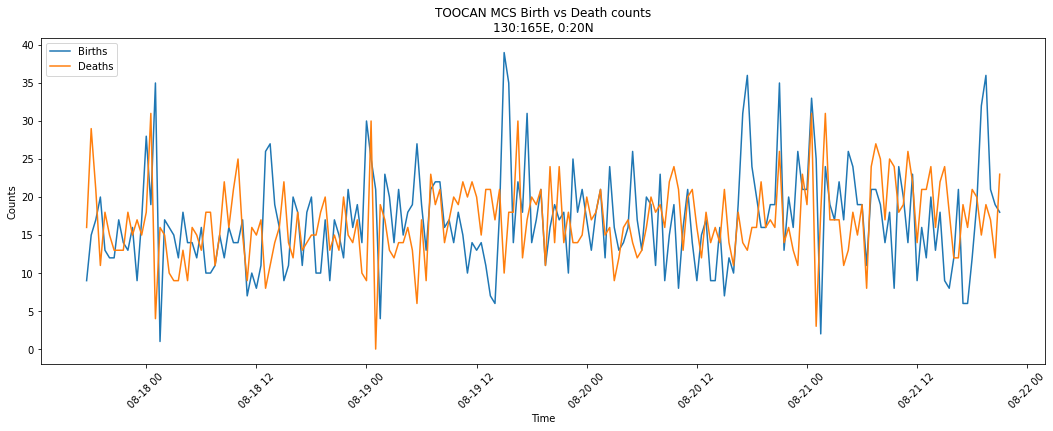

In [288]:
reg_start_idx = 800
reg_end_idx = 1000

fig,ax = plt.subplots(figsize=(18,6))

plt.plot(time_bins[reg_start_idx:reg_end_idx], count_per_bin_Init[reg_start_idx:reg_end_idx], label="Births")
plt.plot(time_bins[reg_start_idx:reg_end_idx], count_per_bin_End[reg_start_idx:reg_end_idx], label="Deaths")

plt.xlabel("Time")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.legend()
plt.title(f"TOOCAN MCS Birth vs Death counts\n{lon_min_subregion}:{lon_max_subregion}E, {lat_min_subregion}:{lat_max_subregion}N")

# Display the plot
plt.show()

# Investigating the points equal to 0

In [289]:
count_per_bin_Init = np.array(count_per_bin_Init)
count_per_bin_End = np.array(count_per_bin_End)

# indices where counts=0 for count_per_bin_Init
zero_indices_Init = np.where(count_per_bin_Init[reg_start_idx:reg_end_idx] == 0)[0]

# indices where counts=0 for count_per_bin_End
zero_indices_End = np.where(count_per_bin_End[reg_start_idx:reg_end_idx] == 0)[0]


print("for count_per_bin_Init:", zero_indices_Init)
print("for count_per_bin_End:", zero_indices_End)

for count_per_bin_Init: []
for count_per_bin_End: [63]


## Convolution and Diurnal Cycle with method 1

convolution

In [290]:
n_int = 48
half_day = int ( n_int / 2 )
kernel = np.ones(n_int) / n_int

In [291]:
convolved_Init = np.convolve(count_per_bin_Init, kernel, mode='same')
convolved_End = np.convolve(count_per_bin_End, kernel, mode='same')

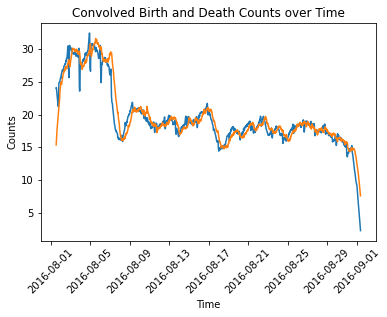

In [292]:
# Create a figure and axes
fig, ax = plt.subplots()

plt.plot(time_bins[half_day:-half_day], convolved_Init[half_day:-half_day], label="Utime_Init")
plt.plot(time_bins[half_day:-half_day], convolved_End[half_day:-half_day], label="Utime_End")

plt.xticks(rotation=45)
ax.set_xlabel('Time')
plt.ylabel("Counts")
plt.title('Convolved Birth and Death Counts over Time')


plt.show()

diurnal cycle method A
* method A = subtracting convolved data from data and using np.reshape

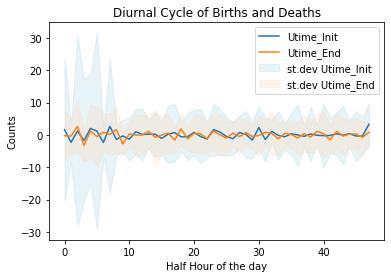

In [293]:
diurnal_hours = range(n_int)  # 24 hours in a day
for i in range(2):
    if i == 0:
        binned_data = count_per_bin_Init
        convolved_data = convolved_Init
        label = "Utime_Init"
        color = "lightblue"
        
        # data is original-convolved data
        diurnal_data = (binned_data - convolved_data)[(half_day + 20):-(half_day + 21)] # indexing this way to be able to reshape
    else:
        binned_data = count_per_bin_End
        convolved_data = convolved_End
        label = "Utime_End"
        color = "peachpuff"
        
        # data is original-convolved data
        diurnal_data = (binned_data - convolved_data)[(half_day + 20):-(half_day + 21)]
    

    # axes for reshaping. ndays calculated based on the length of data
    ndays = diurnal_data.shape[0] // n_int
    nhours = n_int

    diurnal_cycle = np.mean(np.reshape(diurnal_data, (nhours, ndays)), axis=1)
    dcycle_std = np.std(np.reshape(diurnal_data, (nhours, ndays)), axis=1)

    # plot
    plt.plot(diurnal_hours, diurnal_cycle, label=label)
    
    lower_bound = [(diurnal_cycle[i] - dcycle_std[i]) for i in range(len(diurnal_cycle))]
    upper_bound = [(diurnal_cycle[i] + dcycle_std[i]) for i in range(len(diurnal_cycle))]
    
    plt.fill_between(diurnal_hours, lower_bound, upper_bound, color=color, alpha=0.3, label=f'st.dev {label}')
    
    
plt.xlabel('Half Hour of the day')
plt.ylabel("Counts")
plt.title("Diurnal Cycle of Births and Deaths")
plt.legend()
plt.show()

# Histogram of "duration" and "Utime_End" - "Utime_Init"

In [294]:
death_minus_birth = []
for i in range(len(toocan)): # for each MCS:
    Utime_Init = Utime_Init_list[i]
    Utime_End = Utime_End_list[i]
    difference = Utime_End - Utime_Init
    death_minus_birth.append(difference)

death_minus_birth_hrs = []
for diff in death_minus_birth:
    lifetime_in_seconds = diff.total_seconds()
    lifetime_in_hrs = lifetime_in_seconds / 3600
    death_minus_birth_hrs.append(lifetime_in_hrs)

In [295]:
# duration / 2 in order to convert from slot to hours
duration_list_hrs = [( duration / 2 ) for duration in (attr_list(toocan, "duration"))] 

In [296]:
binsize_dur = 1 
bin_min = min( [int(min(duration_list_hrs)), int(min(death_minus_birth_hrs))] ) - 1 # min of either list
bin_max = max( [int(max(duration_list_hrs)), int(max(death_minus_birth_hrs))] ) + 1 # max of either list

dur_bins = np.array(range(bin_min, bin_max, binsize_dur))

In [297]:
count_per_bin_duration = binTimeData_by_step(duration_list_hrs, dur_bins, binsize_dur)
count_per_bin_difference = binTimeData_by_step(death_minus_birth_hrs, dur_bins, binsize_dur)

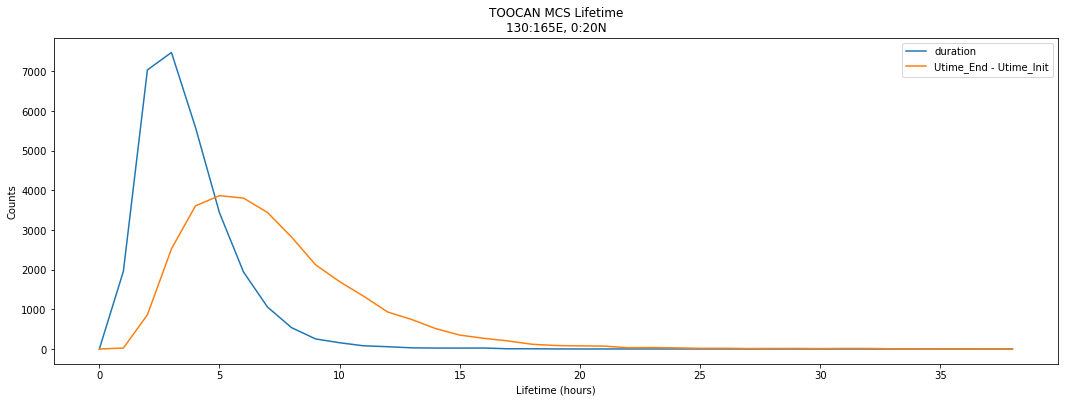

In [298]:
fig,ax = plt.subplots(figsize=(18,6))

plt.plot(dur_bins, count_per_bin_duration, label="duration")
plt.plot(dur_bins, count_per_bin_difference, label="Utime_End - Utime_Init")

plt.xlabel("Lifetime (hours)")
plt.ylabel("Counts")
plt.legend()
plt.title(f"TOOCAN MCS Lifetime\n{lon_min_subregion}:{lon_max_subregion}E, {lat_min_subregion}:{lat_max_subregion}N")

# Display the plot
plt.show()

# Using .clusters.Utime[0] and .clusters.Utime[-1] for birth and death instead
* variables denoted as "first" and "last" and as "new"

In [299]:
Utime_first_list = []
Utime_last_list = []
for utime in Utime_list:
    Utime_first_list.append(utime[0])
    Utime_last_list.append(utime[-1]) 

In [300]:
death_minus_birth_new = []
for i in range(len(toocan)): # for each MCS:
    Utime_first = Utime_first_list[i]
    Utime_last = Utime_last_list[i]
    difference_new = Utime_last - Utime_first
    death_minus_birth_new.append(difference_new)
    
death_minus_birth_hrs_new = []
for diff_new in death_minus_birth_new:
    lifetime_in_seconds_new = diff_new.total_seconds()
    lifetime_in_hrs_new = lifetime_in_seconds_new / 3600
    death_minus_birth_hrs_new.append(lifetime_in_hrs_new)

In [301]:
count_per_bin_difference_new = binTimeData_by_step(death_minus_birth_hrs_new, dur_bins, binsize_dur)

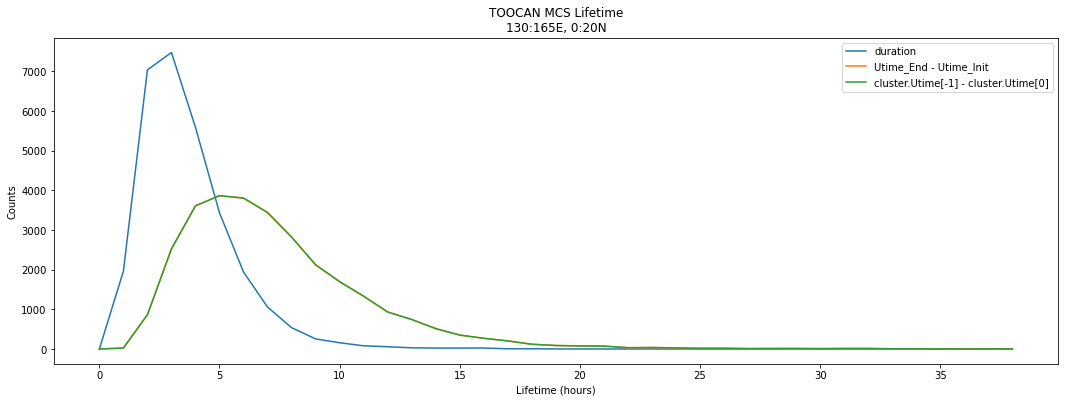

In [302]:
fig,ax = plt.subplots(figsize=(18,6))

plt.plot(dur_bins, count_per_bin_duration, label="duration")
plt.plot(dur_bins, count_per_bin_difference, label="Utime_End - Utime_Init")
plt.plot(dur_bins, count_per_bin_difference_new, label="cluster.Utime[-1] - cluster.Utime[0]")

plt.xlabel("Lifetime (hours)")
plt.ylabel("Counts")
plt.legend()
plt.title(f"TOOCAN MCS Lifetime\n{lon_min_subregion}:{lon_max_subregion}E, {lat_min_subregion}:{lat_max_subregion}N")

# Display the plot
plt.show()

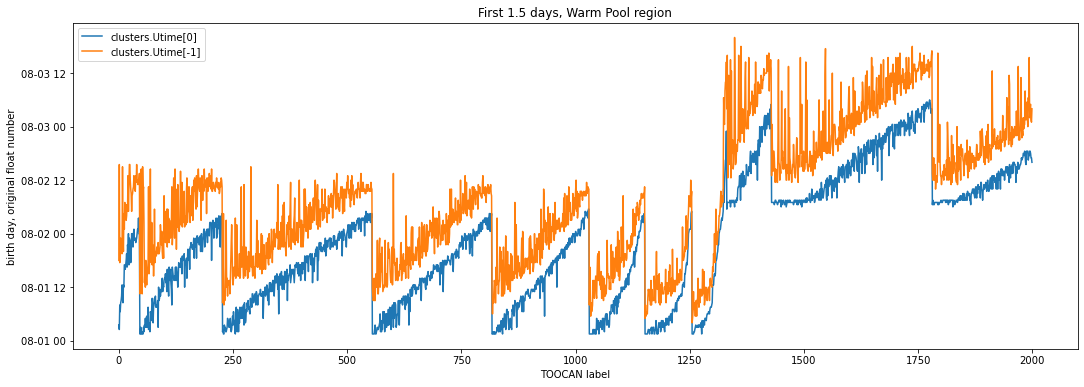

In [303]:
N_toocan = len(Utime_first_list)
N_MCS = 2000

fig,ax = plt.subplots(figsize=(18,6))
ax.plot(np.arange(N_MCS),Utime_first_list[:N_MCS], label="clusters.Utime[0]")
ax.plot(np.arange(N_MCS),Utime_last_list[:N_MCS], label="clusters.Utime[-1]")
ax.set_title('First 1.5 days, Warm Pool region')
ax.set_xlabel('TOOCAN label')
ax.set_ylabel('birth day, original float number')
plt.legend()

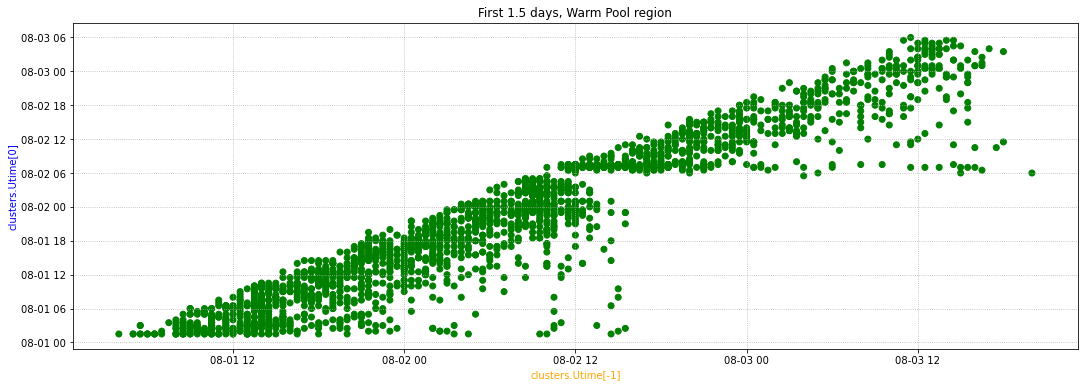

In [304]:
fig,ax = plt.subplots(figsize=(18,6))

colors = ['red' if Utime_first > Utime_last else 'green' for Utime_first, Utime_last in zip(Utime_first_list[:N_MCS], Utime_last_list[:N_MCS])]

plt.scatter(Utime_last_list[:N_MCS], Utime_first_list[:N_MCS], c=colors)


ax.set_title('First 1.5 days, Warm Pool region')
ax.set_xlabel('clusters.Utime[-1]', color="orange")
ax.set_ylabel('clusters.Utime[0]', color="blue")
plt.grid(which='both', linestyle='dotted')

Indices of the most different points:
[1348   52]
38.00000000000046
38.0
37.00000000000045
37.0


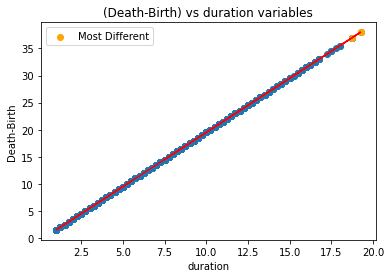

In [322]:
#- relationship between lifetime measurements
n_diff_pts = 2
plt.scatter(duration_list_hrs, death_minus_birth_hrs)

coefficients = np.polyfit(duration_list_hrs, death_minus_birth_hrs, deg=1)
trendline = np.polyval(coefficients, duration_list_hrs)
plt.plot(duration_list_hrs, trendline, color='red')


residuals = death_minus_birth_hrs - trendline
# 5 points with largest residuals
indices_most_different = np.argsort(np.abs(residuals))[::-1][:n_diff_pts] 


print("Indices of the most different points:")
print(indices_most_different)
for index in indices_most_different:
    print(trendline[index])
    print(death_minus_birth_hrs[index])
    

indices_most_different = indices_most_different.tolist()

# 5 most different points in a different color
plt.scatter(
    np.array(duration_list_hrs)[indices_most_different],
    np.array(death_minus_birth_hrs)[indices_most_different],
    color='orange',
    label='Most Different'
)

plt.xlabel('duration')
plt.ylabel('Death-Birth')
plt.title('(Death-Birth) vs duration variables')
plt.legend()

# Show the plot
plt.show()

# Plotting (Area vs time) for different MCSs

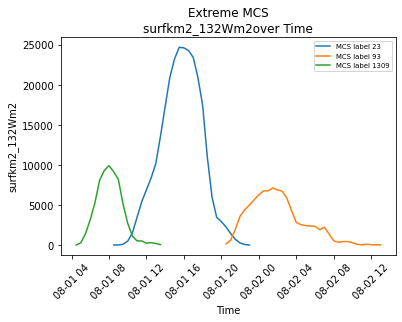

In [323]:
#- Getting data
indices_to_plot = [4, 20, 239]
indices_to_plot = np.array(indices_to_plot)

fig, ax = plt.subplots()
for MCS in range(len(indices_to_plot)):
    MCS_ex = indices_to_plot[MCS]
    MCS_ex_idx = int(MCS_ex.item())
    MCS_attr_ex = getattr(toocan[MCS_ex_idx].clusters, "surfkm2_132Wm2")


    plt.plot(Utime_list[MCS_ex_idx], MCS_attr_ex, label=f"MCS label {toocan[MCS_ex_idx].label}")

plt.xticks(rotation=45)
ax.set_xlabel("Time")
plt.ylabel(f'surfkm2_132Wm2')
plt.title(f"Extreme MCS\nsurfkm2_132Wm2over Time")
plt.legend(fontsize='x-small')

plt.show()